## This notebook plots the SDSS dr7 spectra of all our targets.

-------

### *Color Code:*

<span style="color:#e66101">These spectra correspond to uniform, detected targets</span>

<span style="color:#f5b5a8">These spectra correspond to non-uniform, detected targets</span>

<span style="color:black">These spectra correspond to uniform, non-detected targets</span>

<span style="color:gray">These spectra correspond to non-uniform, non-detected targets</span>

In [17]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [18]:
def make_sameName(i): #remove necessary characters to match image formatting (only to arcsec, remove SDSS) -- elim J as well : 8/23
    
    i = list(i)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(9)
    i.pop(9)
    i.pop(9)
    i.pop(9)

    i = ''.join(i)

    return i

In [22]:
column_names = ["index", "name", "RMS", "redshift", "W1", "W2", "W3", "W4", "W5", "W6", "UNI_FLAG", "MIZ2", "detection", "UNI_DET", "peak_flux", "int_flux", "D_Mpc", "D_cm", "L_rad", "L_2500", "alpha_ro", "RAx", "DECx", "VOFF_CIV_PEAK", "EW_CIV", "plate", "MJD", "Fiber"]

new_plates_wname = pd.read_csv('../Trevors_finalFigs.csv', skiprows=1, names = column_names)

plates = new_plates_wname['plate']
SDSS = new_plates_wname["name"]
duni_mask = new_plates_wname["UNI_DET"] #detection/non-detection and uniform/non-uniform
blueshift = new_plates_wname["VOFF_CIV_PEAK"]
eqw = new_plates_wname["EW_CIV"]

50


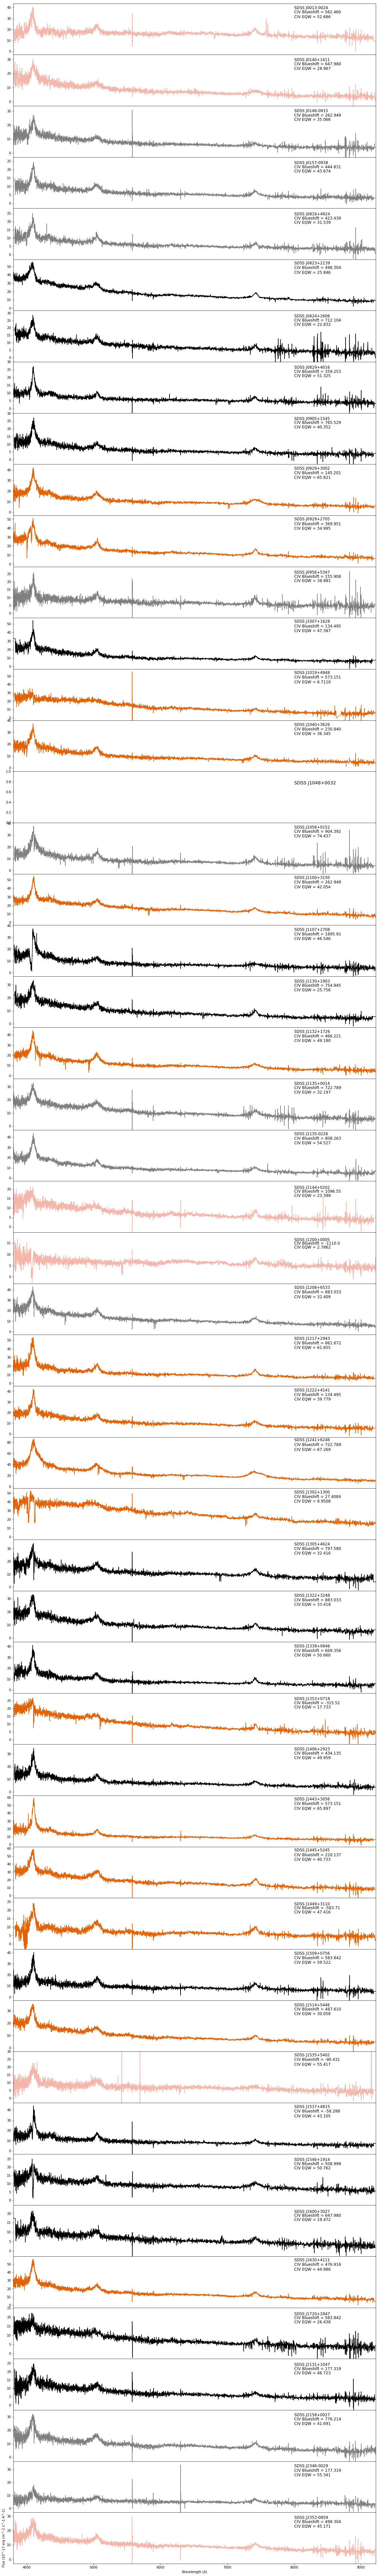

In [34]:
path = 'spectro/1d_26/'
w=0


#Change number of subplots when adding more spectra
fig, axs = plt.subplots(50, sharex=True, figsize = (20,145), gridspec_kw={'hspace': 0})

for i in range(len(plates)): #switched to range to display name on subplots as well
    if w < 50: #FIXME: corrupt fits file at index 15 - plate 0276 (this is actually the only one that doesn't work)
        try:
            for spectra in os.listdir(path+str(plates[i])+'/1d'):

                hdulist = fits.open(path+str(plates[i])+'/1d/'+spectra, ignore_missing_end=True) #navigate to each fits file and open

                sdss_c0 = hdulist[0].header['coeff0']
                sdss_c1 = hdulist[0].header['coeff1']
                sdss_npix = hdulist[0].header['naxis1']
                sdss_loglam = sdss_c0 + sdss_c1*np.arange(sdss_npix)

                sdss_wave = 10.**(sdss_loglam)  #x-axis: wavelength
                sdss_flux = hdulist[0].data[0]  #y-axis: flux

                if duni_mask[i]==-2:
                    axs[w].plot(sdss_wave, sdss_flux, 'grey')
                elif duni_mask[i]==-1:
                    axs[w].plot(sdss_wave, sdss_flux, 'k')
                elif duni_mask[i]==1:
                    axs[w].plot(sdss_wave, sdss_flux, '#f5b5a8')
                elif duni_mask[i]==2:
                    axs[w].plot(sdss_wave, sdss_flux, '#e66101')

                
                axs[w].set_xlim([min(sdss_wave), max(sdss_wave)]) #wavelength domain covered by spectra
                axs[w].set_ylim([-3,max(sdss_flux)+3]) #eliminate whitespace in y-direction - changes for each target
                
                if max(sdss_flux) > 100: #some spectra have large spikes in flux and mess up limits - don't go higher than 55 
                    axs[w].set_ylim([-3,30])
                    axs[w].text(8000, 30-3, 'SDSS J'+make_sameName(SDSS[i]), fontsize=12)
                    axs[w].text(8000, 30-6, 'CIV Blueshift = '+str(blueshift[i])[0:7], fontsize=12)
                    axs[w].text(8000, 30-9, 'CIV EQW = '+str(eqw[i])[0:6], fontsize=12)
                else:
                    axs[w].text(8000, max(sdss_flux)-.05*max(sdss_flux), 'SDSS J'+make_sameName(SDSS[i]), fontsize=12)
                    axs[w].text(8000, max(sdss_flux)-.15*max(sdss_flux), 'CIV Blueshift = '+str(blueshift[i])[0:7], fontsize=12)
                    axs[w].text(8000, max(sdss_flux)-.25*max(sdss_flux), 'CIV EQW = '+str(eqw[i])[0:6], fontsize=12)




                w+=1 #counter to keep track of spectra plotted
                
                
        except OSError:
            axs[w].text(8000, 0.75, 'SDSS J'+make_sameName(SDSS[i]), fontsize=14)    
            w+=1
            pass
                
    else:
        break
        

print(w)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux (10^-17 erg cm^-2 s^-1 A^-1)')
plt.show()

<span style="color:#e66101">These spectra correspond to uniform, detected targets</span>

<span style="color:#f5b5a8">These spectra correspond to non-uniform, detected targets</span>

<span style="color:black">These spectra correspond to uniform, non-detected targets</span>

<span style="color:gray">These spectra correspond to non-uniform, non-detected targets</span>

^Reminder^

Need to fix fits file for 1048+0032: "OSError: Empty or corrupt fits file"